<a href="https://colab.research.google.com/github/nickzherdev/intro_ds/blob/master/hw2_nikolay_zherdev_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links used:

https://rdrr.io/cran/C443/man/drugs.html

https://github.com/deepak525/Drug-Consumption

https://github.com/orlcar/drug-consumption-data-visualization

https://arxiv.org/abs/1506.06297

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# ignore FutureWarning from sklearn
from warnings import simplefilter

In [0]:
data = pd.read_csv('drug_consumption.data')
pd.set_option('display.max_columns', None)
data.columns = [
'ID',
'Age',
'Gender',
'Edu',
'Country',
'Ethn',
'Neuro',
'Extr',
'Open',
'Agree',
'Consc',
'Impul',
'Sensat',
'Alc',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Can',
'Choco',
'Coke',
'Crack',
'Ecst',
'Her',
'Ket',
'Leghighs',
'LSD',
'Meth',
'Mush',
'Nico',
'Semeron',
'VSA']
data.head()

,ID,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,Consc,Impul,Sensat,Alc,Amphet,Amyl,Benzos,Caff,Can,Choco,Coke,Crack,Ecst,Her,Ket,Leghighs,LSD,Meth,Mush,Nico,Semeron,VSA
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
ID          1884 non-null int64
Age         1884 non-null float64
Gender      1884 non-null float64
Edu         1884 non-null float64
Country     1884 non-null float64
Ethn        1884 non-null float64
Neuro       1884 non-null float64
Extr        1884 non-null float64
Open        1884 non-null float64
Agree       1884 non-null float64
Consc       1884 non-null float64
Impul       1884 non-null float64
Sensat      1884 non-null float64
Alc         1884 non-null object
Amphet      1884 non-null object
Amyl        1884 non-null object
Benzos      1884 non-null object
Caff        1884 non-null object
Can         1884 non-null object
Choco       1884 non-null object
Coke        1884 non-null object
Crack       1884 non-null object
Ecst        1884 non-null object
Her         1884 non-null object
Ket         1884 non-null object
Leghighs    1884 non-null object
LSD         1884 non-nul

## Predict drug consumption using a set of demographic characteristics and five personality measurements.  Remark: don't forget to decode at least some key features (see the encoding described in the documentation).

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

In [0]:
data.describe()

,ID,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,Consc,Impul,Sensat
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,0.034364,-0.000512,-0.003777,0.355221,-0.309808,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,544.877779,0.878529,0.482588,0.950330,0.700382,0.165967,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,2.000000,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.750000,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.500000,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.250000,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [0]:
data_columns = data.columns.values
data_columns

array(['ID', 'Age', 'Gender', 'Edu', 'Country', 'Ethn', 'Neuro', 'Extr',
       'Open', 'Agree', 'Consc', 'Impul', 'Sensat', 'Alc', 'Amphet',
       'Amyl', 'Benzos', 'Caff', 'Can', 'Choco', 'Coke', 'Crack', 'Ecst',
       'Her', 'Ket', 'Leghighs', 'LSD', 'Meth', 'Mush', 'Nico', 'Semeron',
       'VSA'], dtype=object)

In [0]:
data.shape

(1884, 32)

In [0]:
notna = pd.notna(data).sum()
# na = data.isna().sum()
notna

ID          1884
Age         1884
Gender      1884
Edu         1884
Country     1884
Ethn        1884
Neuro       1884
Extr        1884
Open        1884
Agree       1884
Consc       1884
Impul       1884
Sensat      1884
Alc         1884
Amphet      1884
Amyl        1884
Benzos      1884
Caff        1884
Can         1884
Choco       1884
Coke        1884
Crack       1884
Ecst        1884
Her         1884
Ket         1884
Leghighs    1884
LSD         1884
Meth        1884
Mush        1884
Nico        1884
Semeron     1884
VSA         1884
dtype: int64

There are no NaNs in the dataset, greeat

In [0]:
# Count number of unique values in every column
# data.apply(pd.Series.nunique)

## Task - Please, select a reasonable binary target combining these columns and motivate your selection. You can also select a couple of targets to analyze & compare the performance of ML models within the next steps. Important: don't forget to drop columns directly associated with the selected target.

My first idea was to separate respondents by two classes: users of legal drugs (coffein, chocolate, alcohol, nikotine) and users of illegal drugs (everything else). But as I read in the original arcticle, there are "physiological, psychological and cultural differences between usage of different drugs". So to solve class-imbalance problem I chose to agregate non-users (CL0, CL1) and users (CL2, CL3, CL4, CL5, CL6) and build a model to predict users of one particular drug.

TARGET: predict if the user is at risk of becoming one particular drug user - ECSTASY


In [0]:
data.set_index('ID', inplace=True)
# data.head(10)

In [0]:
columns = [
'Alc',
'Amphet',
'Amyl',
'Benzos',
'Caff',
'Can',
'Choco',
'Coke',
'Crack',
'Ecst',
'Her',
'Ket',
'Leghighs',
'LSD',
'Meth',
'Mush',
'Nico',
'Semeron',
'VSA']

cp = [
'User_Alcohol',
'User_Amphet', 
'User_Amyl', 
'User_Benzos', 
'User_Caff', 
'User_Cannabis', 
'User_Choc', 
'User_Coke', 
'User_Crack',
'User_Ecstasy', 
'User_Heroin', 
'User_Ketamine', 
'User_Legalh', 
'User_LSD', 
'User_Meth', 
'User_Mushrooms',
'User_Nicotine', 
'User_Semer', 
'User_VSA']


In [0]:
data_bin = data.copy()

In [0]:
data_bin = data_bin.replace({
    'CL0':0, # Never Used cannabis
    'CL1':0, # Used cannabis over a decade ago
    'CL2':1, # Used in last decade
    'CL3':1, # Used in last year
    'CL4':1, # Used in last month
    'CL5':1, # Used in last week
    'CL6':1}) # Used in last day

In [0]:
data_bin.head()

,Age,Gender,Edu,Country,Ethn,Neuro,Extr,Open,Agree,Consc,Impul,Sensat,Alc,Amphet,Amyl,Benzos,Caff,Can,Choco,Coke,Crack,Ecst,Her,Ket,Leghighs,LSD,Meth,Mush,Nico,Semeron,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Also we'll remove entries from those respondents who claimed that they've ever used Semeron (fake drug).


In [0]:
data_bin.drop(data_bin[data_bin.Semeron == 1].index, inplace=True)

After that we can also drop 'Semeron' feature

In [0]:
data_bin = data_bin.drop(['Semeron'], axis=1)

In [0]:
data_bin.shape

(1878, 30)

### Generate three hypotheses related to your problem and try to confirm or deny them using exploratory visualization. Please, try to use different types of plots if possible. (6 points, 2 points for each hypothesis. If you use only one type of plots for all hypotheses -- no more than 4 points for this part)

Easy:

- Legal drugs (Chocolate, Coffein, Alco) are used on every day basis (Last day, Last Week), while illegal drugs will have maximum at 'Never Used'. Semi-Legal Drugs (Cannabis) stronlgly correlates with laws of the country the user lives in.

- Oscore (Openness to experience) and Nscore (Neuroticism) positevely correlates with drug-consumption, while Cscore (Conscientiousness) negatively correlates with drug-consumption

- Higher level of Education corresponds to lower drug-consumption

## Hypothesis 1

Legal drugs (Chocolate, Coffein, Alco) are used on every day basis (Last day, Last Week), while illegal drugs will have maximum at 'Never Used'. Semi-Legal Drugs (Cannabis) stronlgly correlates with laws of the country the user lives in.

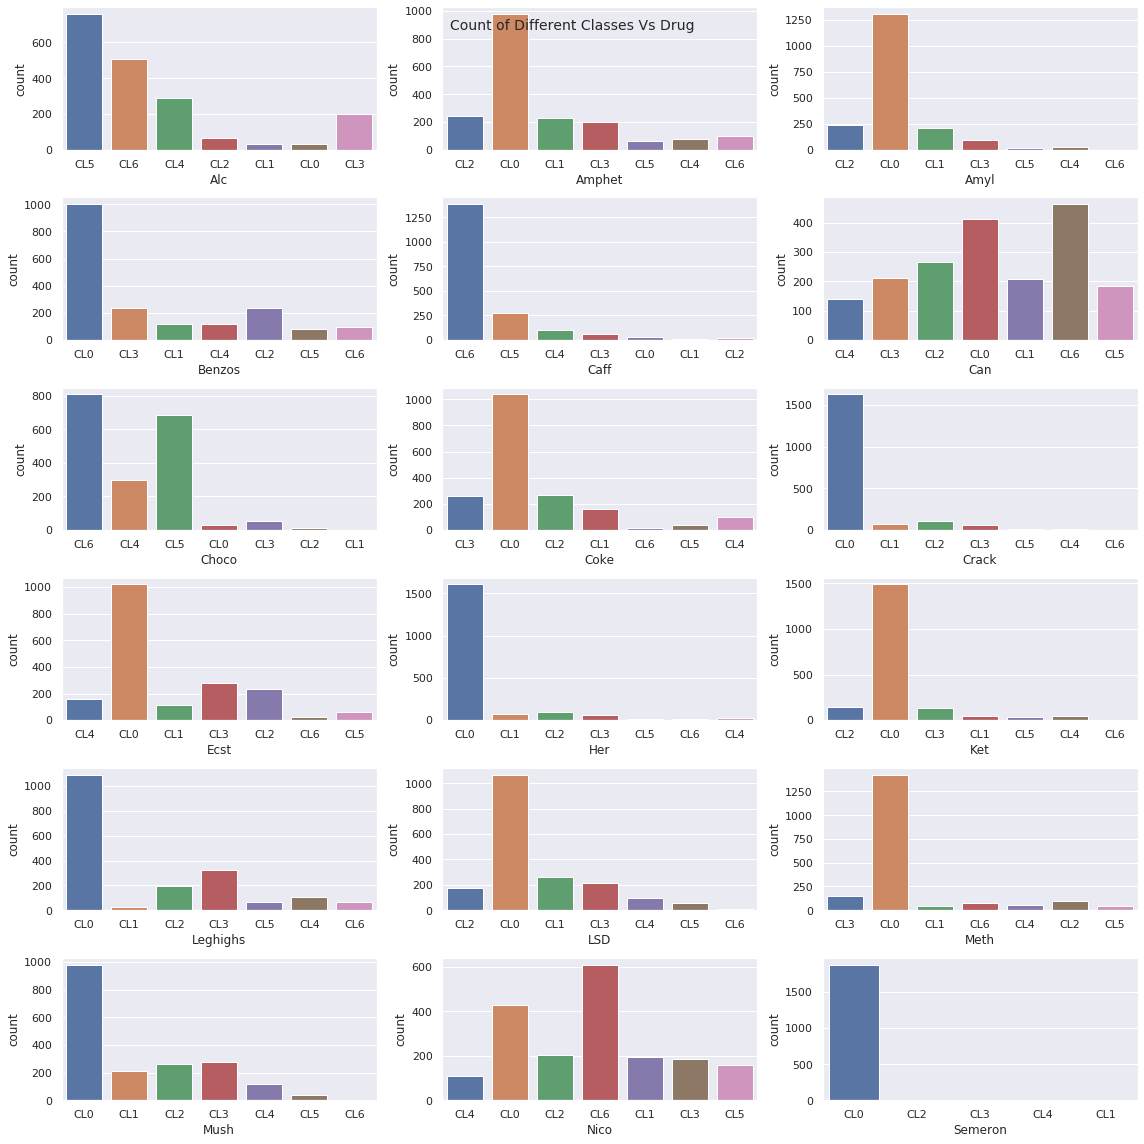

In [0]:
fig, axes = plt.subplots(6,3,figsize = (16,16))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=14)
k=0
for i in range(6):
    for j in range(3):
        sns.countplot(x=columns[k], data=data,ax=axes[i][j])
        k+=1

plt.tight_layout()
plt.show()

## Hypothesis 2

Oscore (Openness to experience) and Nscore (Neuroticism) positevely correlates with drug-consumption, while Cscore (Conscientiousness) negatively correlates with drug-consumption

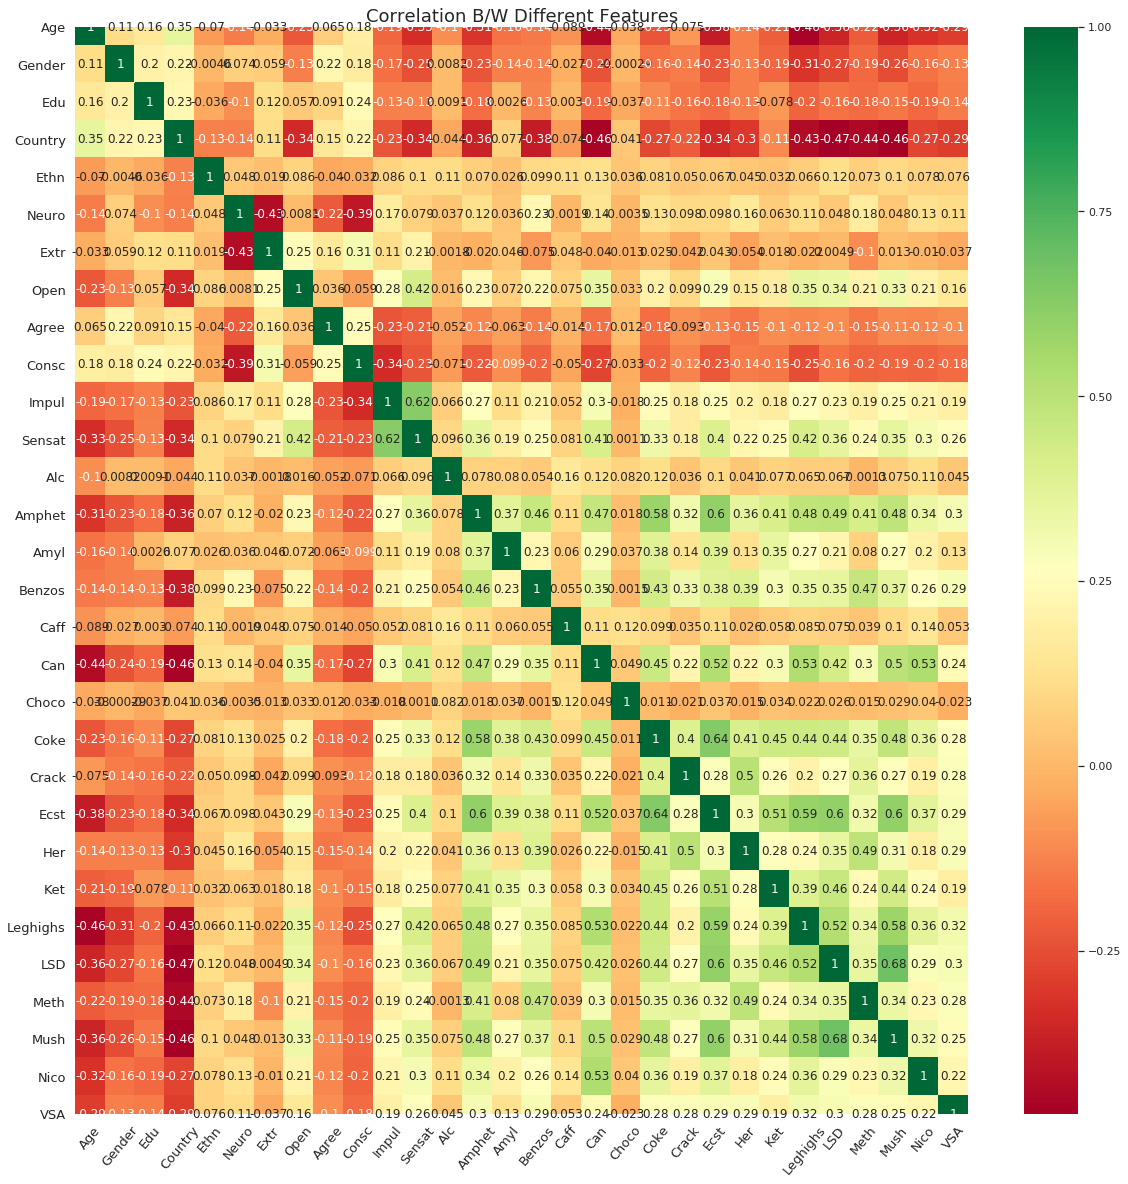

In [0]:
corrmat = data_bin.corr()

plt.figure(figsize=(20,20))

sns.set(font_scale=1)
hm = sns.heatmap(corrmat,cmap = 'RdYlGn',annot=True,
             yticklabels = data_bin.columns, xticklabels = data_bin.columns)
plt.xticks(fontsize=13,rotation=50)
plt.yticks(fontsize=13)
plt.title("Correlation B/W Different Features",fontsize=18)
plt.show()

As seen in correlation heatmap, ethnicity correlates insignificantly with any other features, so we can exclude it from further analysis.

On contrary, feature 'Country' has strong correlation to some types of drugs, we'll investigate this phenomena later.

There are several more interesting observations. There are some drugs that correlate significantly more with some type of drugs that with others. For example:

- Ecstasy positively correlates to consumption of Amphetamin (0.52), Cannabis (0.55), Cocaine (0.61), Ketamine (0.51), Legal heighs (0.55), LSD (0.57) and Mushrooms (0.55).
- On contrary, Heroin correlates more with Benzos (0.43), Cocain (0.42), Crack (0.53) and Methadone (0.48)

And as seen from the table, consumption of chocolate and coffein, mainly, doesn't strongly correlate to anything else.

Text(0.5, 1.0, 'Distribution of Ethnicities')

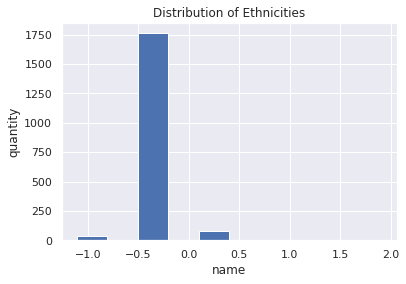

In [0]:
a, b, c = plt.hist(data_bin['Ethn'])
plt.ylabel('quantity')
plt.xlabel('name')

plt.title('Distribution of Ethnicities')

As seen in this table, 'ethnicity' is also heavily skewed to 'White'. So we definetely need to remove it from analysis.

### Let's see how well distributed is "Country" feature.

Text(0.5, 1.0, 'Distribution of countries')

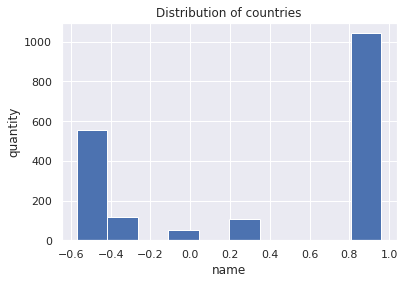

In [0]:
a, b, c = plt.hist(data_bin['Country'])
plt.ylabel('quantity')
plt.xlabel('name')
# labels = ['USA', 'Other', 'Republic of Ireland', 'Australia', 'Canada', 'New Zealand', 'UK']

# plt.xticks(labels)
plt.title('Distribution of countries')

-0.09765 Australia 54 2.86% 

0.24923 Canada 87 4.62% 

-0.46841 New Zealand 5 0.27% 

-0.28519 Other 118 6.26% 

0.21128 Republic of Ireland 20 1.06% 

#### 0.96082 UK 1044 55.38% 

#### -0.57009 USA 557 29.55% 


According to the the table there are many more respondents from the UK and USA. Though country is an important factor (for example, is strongly correlates with Cannabis consumption), but there is not much data about other countries, so we also need to exlude this feature from using in prediction step.

## Hypothesis 3

Respondents WITHOUT higher education are more likely to be drug-users.

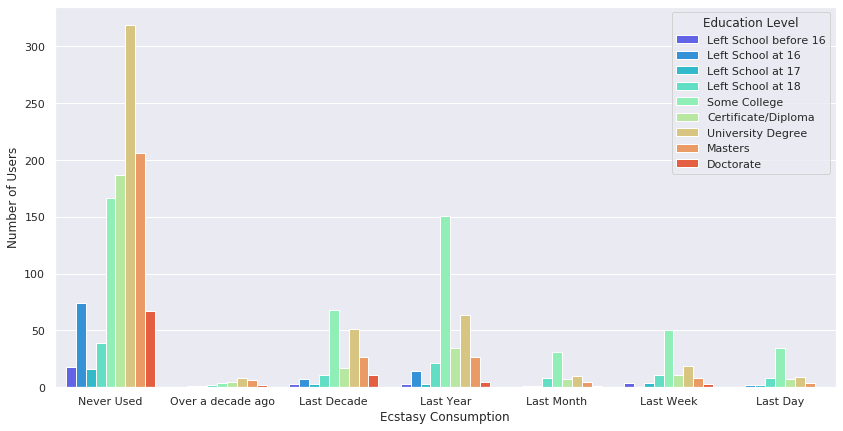

In [0]:
# Analyzing drug consumption rate across Education Level
sns.set(rc={'figure.figsize':(14,7)})
x = ('yes','no')
labels = ['Never Used', 'Over a decade ago', 'Last Decade', 'Last Year', 'Last Month', 'Last Week', 'Last Day']
EducationPlot = sns.countplot(x='Leghighs', hue='Edu', data=data,palette='rainbow')

EducationPlot.set_xticklabels(labels)
EducationPlot.set(ylabel = 'Number of Users', xlabel='Ecstasy Consumption')

plt.legend(title='Education Level', loc='upper right', 
           labels=['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate']);

## So, last cleaning data steps were the following:

- Drop drug-columns that site time variable (CL0, CL1 and so on) and leave only binary 0/1 for User/Non-User.
- Drop Ethnicity, as it shows weak correlation to drug consumption and skewed to 'White'.
- Drop Country, because the distribution is skewed to UK and USA and very little data presented about other countries.
- We removed entries from those respondents who claimed that they've ever used Semeron (fake drug).
- And we removed the column "Semeron" as it's not needed anymore.


So, for the analysis we have 10 input features: Age, Gender, Edu, Neuro, Extr, Open, Agree, Consc, Impul, Sensat

In [0]:
data_bin = data_bin.drop(['Ethn', 'Country'], axis=1)

In [0]:
data_bin.head()

,Age,Gender,Edu,Neuro,Extr,Open,Agree,Consc,Impul,Sensat,Alc,Amphet,Amyl,Benzos,Caff,Can,Choco,Coke,Crack,Ecst,Her,Ket,Leghighs,LSD,Meth,Mush,Nico,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0
3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0
5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0
6,2.59171,0.48246,-1.22751,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


## Task 3.1 - Please, analyze the balance of the target variable (or variables if you decided to work with two output variables). Which quality metrics are suitable for your task? Why? (2 points).

As was mentioned earlier, we separated users on decade-basis: 
- 'never-over_decade' are non-users
- 'last_decade-year-month-week-day' are users

So the data became relatively well balanced classification problem, as seen below:

In [0]:
data_bin['Ecst'].value_counts()

0    1131
1     747
Name: Ecst, dtype: int64

I choose ROC AUC score because this is a binary task with slightly imbalanced classes, and ROC AUC allows me not to choose particular prediction threshold.

Also I choose to balance between recall and precision.

This analysis will allow to predict the risk of Ecstasy use based on the given features.

## Task 3.2 - Split data into train and test sets using train_test_split. Important: if your problem is imbalanced, use stratify parameter.  The test set shouldn't be used for models fitting or selection of the optimal set of parameters (1 point).

In [0]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Age', 'Gender', 'Edu', 'Neuro',
       'Extr', 'Open', 'Agree', 'Consc', 'Impul', 'Sensat']
predicted_class_names = ['Ecst']

X = data_bin[feature_col_names].values
y_ = data_bin[predicted_class_names].values

y = y_.copy()
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
X.shape

(1878, 10)

In [0]:
y_.shape

(1878, 1)

In [0]:
y.shape

(1878,)

## Task 4 - ML Models

In [0]:
# Let's see the ranges of our data

X.max(0) - X.min(0)

array([3.54368, 0.96492, 4.42028, 6.73829, 6.54786, 6.17554, 6.92872,
       6.92872, 5.45685, 4.00021])

#### Let's apply a scaler

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [0]:
# Make pipeline for Logistic Regression

lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
# y_predict_proba[:,1]

In [0]:
# Make classification report for Logistic Regression

y_predict = lr.predict(X_test)
y_predict_proba = lr_best.predict_proba(X_test)[:,1]

print('roc auc', roc_auc_score(y_test, y_predict_proba))
print(" ")
log_report = classification_report(y_test, y_predict)
print(log_report)

roc auc 0.7978627450980392
 
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       300
           1       0.65      0.61      0.63       170

    accuracy                           0.74       470
   macro avg       0.72      0.71      0.71       470
weighted avg       0.74      0.74      0.74       470



#### Not bad. Let's now split our data using stratifiedKFold (even though our data seems almost balanced)

In [0]:
# split data using StratifiedKFold
stratifiedKFold = StratifiedKFold(n_splits=3, shuffle=True)
cv = stratifiedKFold.split(X, y)

# Make pipeline and fit Logistic Regression with optimized parameters
lr_best = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', C=0.01, penalty='l2'))
lr_best.fit(X_train, y_train)

In [0]:
# sorted(sklearn.metrics.SCORERS.keys())

In [0]:
# cross_val_score automatically builds K models and then estimates errors on the corresponding test sets

scores = cross_val_score(lr_best, X, y, scoring='roc_auc', cv=cv)

y_predict = lr_best.predict(X_test)
y_predict_proba = lr_best.predict_proba(X_test)

print('stratifiedKFold ROC AUC score: {0:.3f} ± {1:.3f}'.format(scores.mean(), scores.std()))
print(" ")
log_report = classification_report(y_test, y_predict)
print(log_report)

In [0]:
scores

In [0]:
values = data_bin.columns[:10].values
coef_importance = lr_best.steps[1][1].coef_.ravel()
plt.title('Feature Importance')
plt.barh(values, coef_importance);

As seen on feature importance plot, there are features that individuals involved in drug use are more likely to have higher scores for Openness, Sensation and Neuroticism, and low scores for Agreeableness and Conscientiousness. Though that's strange, that Neuroticism got so low score. As for high Openness score - this can correlate to intelligence and therefore understandable.


#### Let's do it again with GridSearch!

In [0]:
# Use grid-search to find optimal parameters for LogisticRegression

lr_best = GridSearchCV(LogisticRegression(), 
                        {"penalty": ['l1', 'l2'],
                        "C": [0.001,0.01,0.1,1,10,100,1000],
                        },
                         scoring='roc_auc',
                       cv=3)
lr_best.fit(X_train, y_train)
y_predict = lr_best.predict(X_test)



In [0]:
print(lr_best.best_score_)
y_predict_proba = lr_best.predict_proba(X_test)[:,1]

print('roc auc', roc_auc_score(y_test, y_predict_proba))
print(lr_best.best_params_)

After fitting with optimal params, cross_val_score increased

## Repeat the last step with any tree-based model (Random Forest, GradientBoosting, XGBoost or CatBoost). Use GridSearchCV to identify the optimal set of parameters (at least, try to different reasonable values of  n_estimators and max_depth). Check the quality on the test set  (4 points).

In [0]:
from sklearn.ensemble import RandomForestClassifier


In [0]:
# Evaluate data with RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
y_predict_proba = rfc.predict_proba(X_test)[:,1]


print("cross_val_score", cross_val_score(rfc, X, y, cv=3).mean())
print('roc auc', roc_auc_score(y_test, y_predict_proba))


In [0]:
# Use grid-search to find optimal parameters for RandomForestClassifier

rfc = GridSearchCV(RandomForestClassifier(), 
                   {'n_estimators':[50, 100, 200, 300, 400, 500, 750], 
                    'max_depth':[2, 3, 4, 6, 10, 15]
                   },
                   scoring='roc_auc', cv=3)
rfc.fit(X_train, y_train)
y_predict = rfc.predict(X_test)
y_predict_proba = rfc.predict_proba(X_test)[:,1]

print(rfc.best_score_)
print('roc auc', roc_auc_score(y_test, y_predict_proba))
print(rfc.best_params_)

After fitting with optimal params, roc_auc score increased almost by 2 p.p.

## Plot the dependency of GridSearchCV score on max_depth

Function below is taken from here:

https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [0]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV roc auc Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

n_estimators = [50, 100, 200, 300, 400, 500, 750]
max_depth = [2, 3, 4, 6, 10, 15]
    
# Calling Method 
plot_grid_search(rfc.cv_results_, n_estimators, max_depth, 'N Estimators', 'Max Features')

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
# Evaluate data with GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, max_depth=5)

gbc.fit(X_train, y_train)
y_predict = gbc.predict(X_test)
y_predict_proba = gbc.predict_proba(X_test)[:,1]


print("cross_val_score", cross_val_score(gbc, X, y, cv=3).mean())
print('roc auc', roc_auc_score(y_test, y_predict_proba))

In [0]:
# Use grid-search to find optimal parameters for GradientBoostingClassifier

gbc = GridSearchCV(GradientBoostingClassifier(), 
                   {'n_estimators':[50, 100, 200, 300, 400, 500, 750], 
                    'max_depth':[2, 3, 4, 6, 10, 15]
                   },
                   scoring='roc_auc', cv=3)


gbc.fit(X_train, y_train)
y_predict = gbc.predict(X_test)
y_predict_proba = gbc.predict_proba(X_test)[:,1]

print(gbc.best_score_)
print('roc auc', roc_auc_score(y_test, y_predict_proba))
print(gbc.best_params_)

After fitting with optimal params, roc_auc score and cross_val_score increased almost by 5 p.p.

## In addition to the already calculated metrics, please draw Precision-Recall curves (Links to an external site.) for both linear and tree-based models. Compare models using PR-curves.

Code below taken from here:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [0]:
# from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from inspect import signature

## For GradientBoostingClassifier and for LogReg Model

In [0]:
y_score_lr = lr_best.decision_function(X_test)
y_score_gbc = gbc.decision_function(X_test)

In [0]:
precision, recall, _ = precision_recall_curve(y_test, y_score_lr)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)



precision_gbc, recall_gbc, _ = precision_recall_curve(y_test, y_score_gbc)

plt.step(recall_gbc, precision_gbc, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_gbc, precision_gbc, alpha=0.2, color='r', **step_kwargs)



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve')

Perfomance of GradientBoostingClassifier and LogisticRegression in terms of average precision-recall score is similar. Both models show ROC AUC score about 0.79

## Summary

During this work we we separated users on decade-basis:

- 'never-over_decade' are non-users
- 'last_decade-year-month-week-day' are users

So the data became relatively well balanced binary classification problem.


- It was necessary to drop 'Ethnicity', as it showed weak correlation to drug consumption and was skewed to 'White'.
- 'Country' was also dropped, because the distribution is skewed to UK and USA and very little data presented about other countries.
- We removed entries from those respondents who claimed that they've ever used Semeron (fake drug).
- And we removed the column "Semeron" as it's not needed anymore.

So, for the analysis we had 10 input features left: Age, Gender, Edu, Neuro, Extr, Open, Agree, Consc, Impul, Sensat

This analysis will allow to predict the risk of Ecstasy use based on the given features.

I choose ROC AUC score because this is a binary task with slightly imbalanced classes, and ROC AUC allows me not to choose particular prediction threshold.

Also I choose to balance between recall and precision.

As seen on feature importance plot, there are features that individuals involved in drug use are more likely to have higher scores for Openness, Sensation and Neuroticism, and low scores for Agreeableness and Conscientiousness. Though that's strange, that Neuroticism got so low score. As for high Openness score - this can correlate to intelligence and therefore understandable.

I used LogisticRegression, RandomForestClassifier and GradientBoostingClassifier - they all showed close result (0.79) with fine-tuned params.